# **Importing Libraries**

In [307]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as ss
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import plotly.express as px
import math
from scipy.cluster.hierarchy import dendrogram, linkage

# **Data Loading and Exploration**

In [308]:
data = pd.read_csv('bank_task4.csv')
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [309]:
data.shape

(11162, 17)

In [310]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [311]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

# **Data Cleaning**

In [312]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [313]:
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [314]:
data.duplicated().sum()

0

In [315]:
data.drop_duplicates(inplace=True)

In [316]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('age')

z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
high_z_scores = z_scores > 3

# Cap outliers based on Z-score
for column in numeric_cols:
    upper_cap = data[column].quantile(0.95)  # Capping at the 95th percentile
    lower_cap = data[column].quantile(0.05)  # Capping at the 5th percentile
    data.loc[high_z_scores[column], column] = np.where(
        data.loc[high_z_scores[column], column] > data[column].mean(),
        upper_cap,
        lower_cap
    )

/var/folders/hq/f1f9rdc54j7957q7yl8hsy7r0000gn/T/ipykernel_99818/3962597319.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45
 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 6026.45 

In [317]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1320.818299,15.658036,359.757561,2.330765,48.707758,0.691632
std,11.913369,1926.431209,8.420740,302.751827,1.791297,98.522094,1.458705
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,11174.000000,31.000000,1410.000000,10.000000,377.000000,7.000000


# **Data Transformation**

In [318]:
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(data[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)

# Concatenate encoded columns back to the original DataFrame
data = pd.concat([data.drop(categorical_cols, axis=1), pd.DataFrame(encoded_columns, columns=encoded_col_names)], axis=1)

In [319]:
data.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,0.530633,-1.265746,2.253572,-0.742939,-0.504557,-0.474163,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,56,-0.662300,-1.265746,2.378763,-0.742939,-0.504557,-0.474163,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,41,-0.026381,-1.265746,3.399776,-0.742939,-0.504557,-0.474163,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,55,0.599675,-1.265746,0.724198,-0.742939,-0.504557,-0.474163,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,54,-0.590143,-1.265746,1.034697,-0.184659,-0.504557,-0.474163,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# **Feature Engineering**

In [320]:
data.dtypes

age                      int64
balance                float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_married        float64
marital_single         float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
default_yes            float64
housing_yes            float64
loan_yes               float64
contact_telephone      float64
contact_unknown        float64
month_aug              float64
month_dec              float64
month_feb              float64
month_jan              float64
month_ju

In [321]:
# Feature Addition

data['interaction_balance_duration'] = data['balance'] * data['duration']

avg_balance_per_job = data.groupby('job_management')['balance'].transform('mean')
data['avg_balance_per_job'] = avg_balance_per_job

data['balance_to_duration_ratio'] = data['balance'] / data['duration']

Selected features by Lasso for Regression:
 ['age', 'balance_to_duration_ratio']


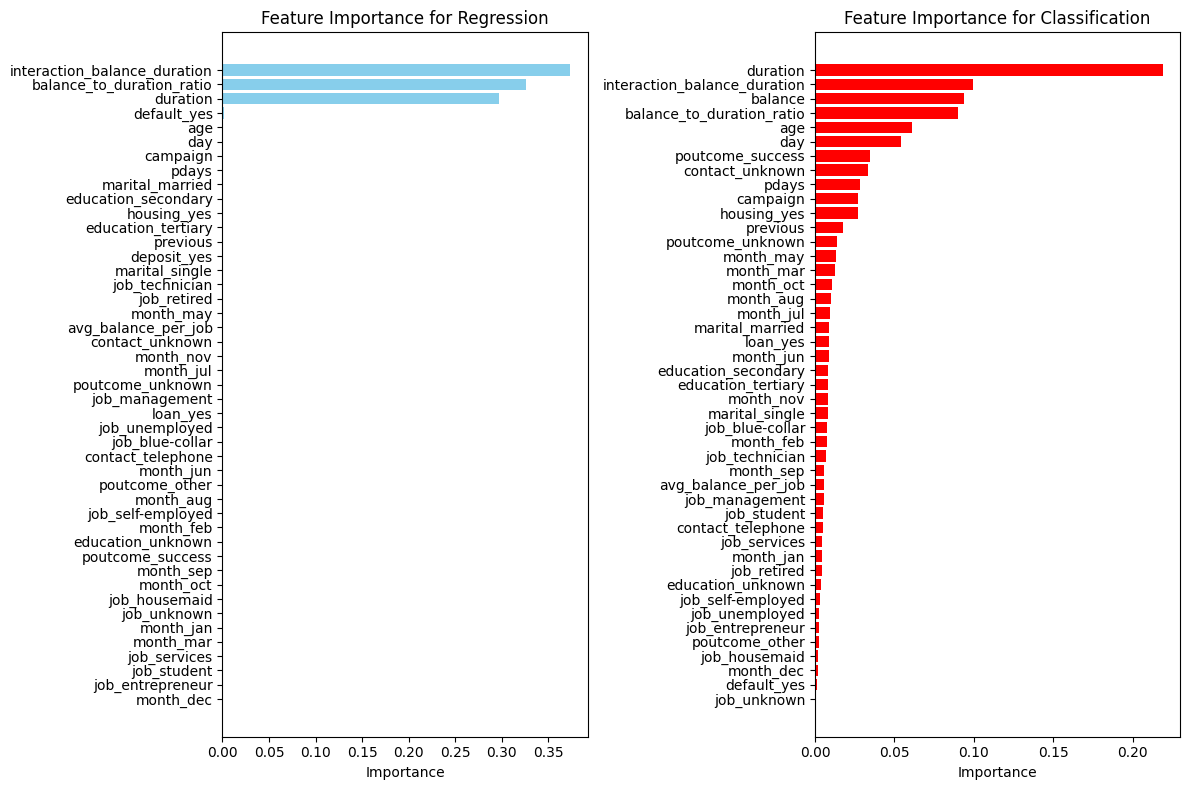

In [322]:
# Regression Analysis - Target Variable 'balance'
X_reg = data.drop('balance', axis=1)
y_reg = data['balance']

# Lasso for feature selection in regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_reg, y_reg)
lasso_reg_coef = pd.DataFrame({'Feature': X_reg.columns, 'LassoCoef': lasso_reg.coef_})
lasso_selected_features_reg = lasso_reg_coef[lasso_reg_coef['LassoCoef'] != 0]['Feature']
print("Selected features by Lasso for Regression:\n", lasso_selected_features_reg.tolist())

# Fitting RandomForest for regression
forest_reg = RandomForestRegressor()
forest_reg.fit(X_reg, y_reg)

importances_reg = pd.DataFrame({'Feature': X_reg.columns, 'Importance': forest_reg.feature_importances_})
importances_sorted_reg = importances_reg.sort_values(by='Importance', ascending=True)
# print("Feature Importance for Regression:\n", importances_sorted_reg)



# Classification Analysis - Target Variable 'deposit_yes'
X_cls = data.drop('deposit_yes', axis=1)
y_cls = data['deposit_yes']

# Fitting RandomForest for classification
forest_cls = RandomForestClassifier()
forest_cls.fit(X_cls, y_cls)

importances_cls = pd.DataFrame({'Feature': X_cls.columns, 'Importance': forest_cls.feature_importances_})
importances_sorted_cls = importances_cls.sort_values(by='Importance', ascending=True)
# print("Feature Importance for Classification:\n", importances_sorted_cls)

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(importances_sorted_reg['Feature'], importances_sorted_reg['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Regression')

plt.subplot(1, 2, 2)
plt.barh(importances_sorted_cls['Feature'], importances_sorted_cls['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Feature Importance for Classification')

plt.tight_layout()
plt.show()

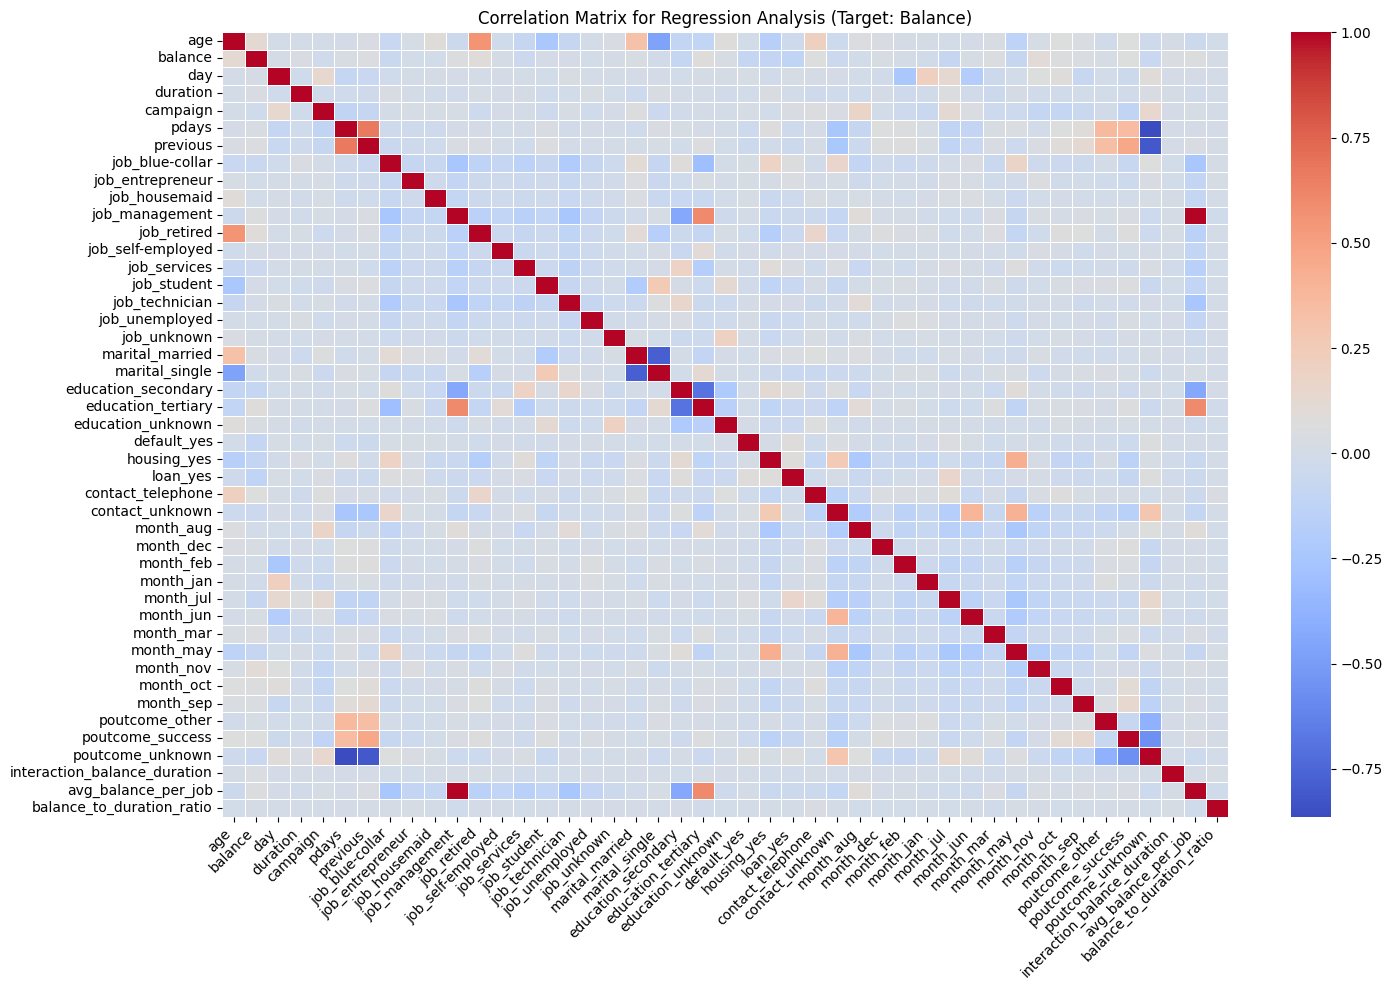

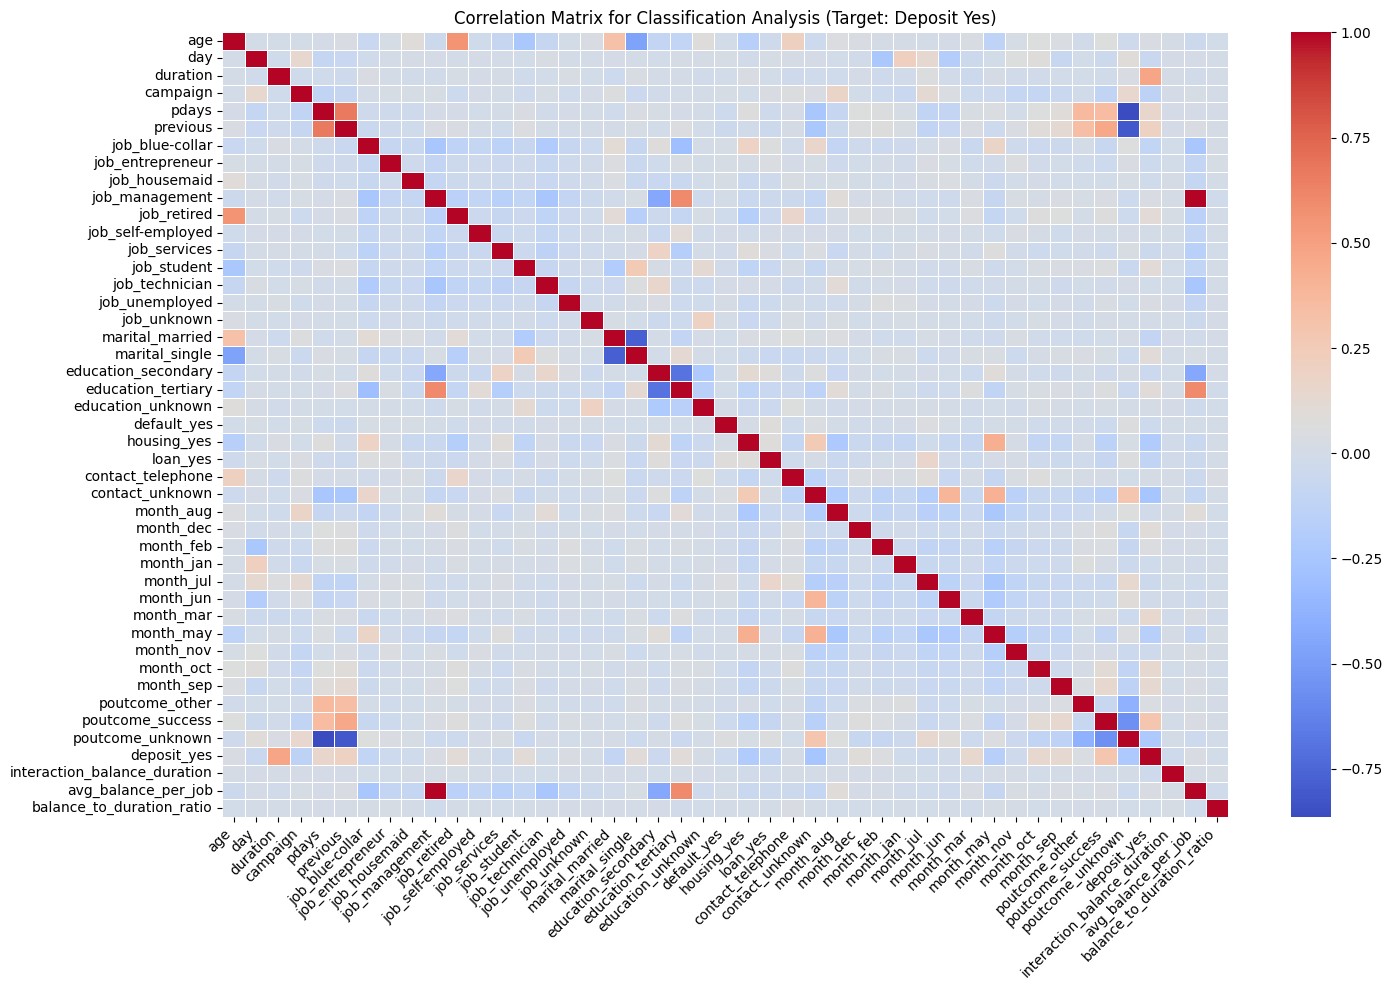

In [323]:
# Calculate correlation matrices
corr_matrix_reg = data.drop('deposit_yes', axis=1).corr() 
corr_matrix_cls = data.drop('balance', axis=1).corr()

# Visualization of Correlation Matrix for Regression (Predicting 'balance')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_reg, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Regression Analysis (Target: Balance)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization of Correlation Matrix for Classification (Predicting 'deposit_yes')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_cls, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Classification Analysis (Target: Deposit Yes)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [324]:
features_to_drop = set()

features_to_drop.update(lasso_reg_coef[lasso_reg_coef['LassoCoef'] == 0]['Feature'])

low_importance_reg = importances_reg[importances_reg['Importance'] < 0.0001]['Feature']
features_to_drop.update(low_importance_reg)

low_importance_cls = importances_cls[importances_cls['Importance'] < 0.001]['Feature']
features_to_drop.update(low_importance_cls)

data_dropped_features_reg = data.drop(columns=list(features_to_drop))
data_dropped_features_reg['balance'] = data['balance']
data_dropped_features_reg['deposit_yes'] = data['deposit_yes']
data = data_dropped_features_reg

# print("Remaining features for Regression and Classification:\n", data_dropped_features_reg.columns)

# **Exploratory Data Analysis (EDA)**

## **Summary Statistics**

In [286]:
print("Summary Statistics for Numerical Features:")
print(data.describe())

Summary Statistics for Numerical Features:
                age       balance  balance_to_duration_ratio   deposit_yes
count  11162.000000  1.116200e+04               11162.000000  11162.000000
mean      41.231948 -4.074067e-17                   0.239201      0.473840
std       11.913369  1.000045e+00                  44.868830      0.499338
min       18.000000 -4.240060e+00               -1245.138691      0.000000
25%       32.000000 -6.223280e-01                  -0.612383      0.000000
50%       39.000000 -4.001455e-01                   0.294206      0.000000
75%       49.000000  2.009929e-01                   0.934484      1.000000
max       95.000000  5.114962e+00                2219.669151      1.000000


## **Visualization**

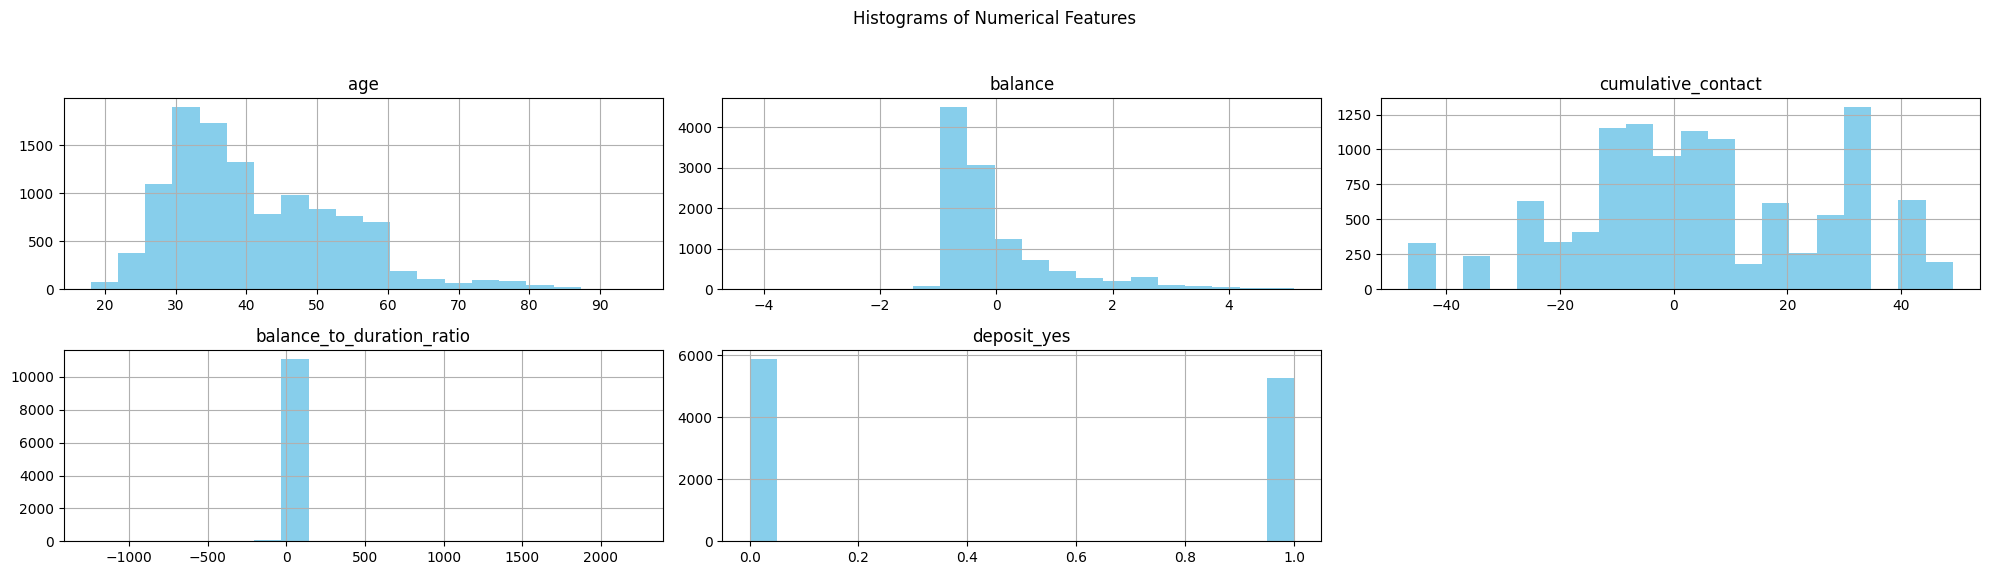

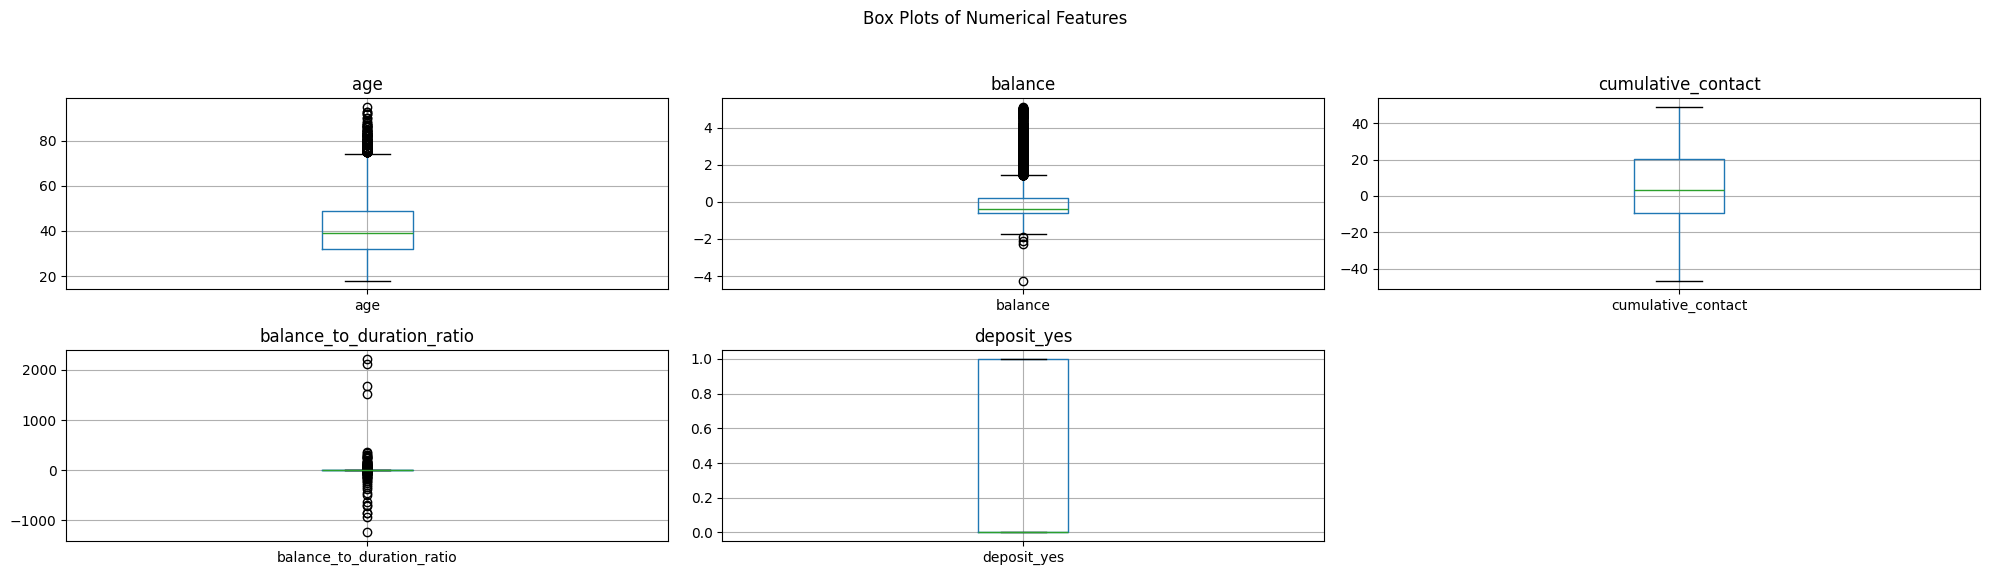

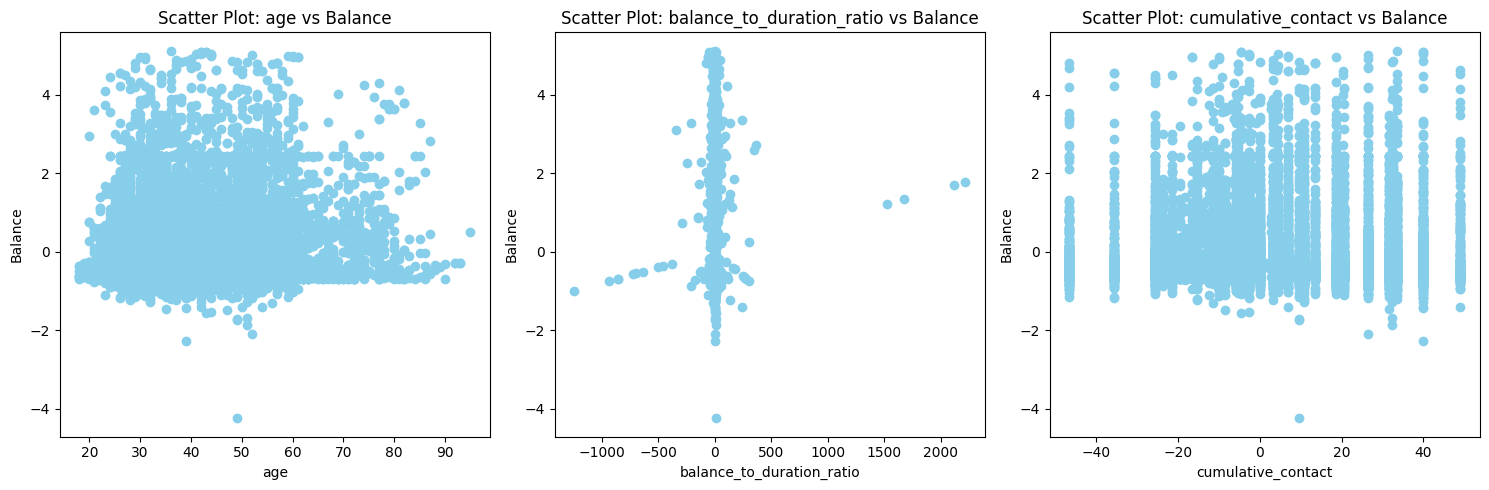

In [266]:
num_features = len(data.select_dtypes(include=[np.number]).columns)
cols = math.ceil(math.sqrt(num_features))
rows = math.ceil(num_features / cols)

# Histograms of Numerical Features
data.hist(figsize=(20, rows * 3), bins=20, layout=(rows, cols), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to fit the supertitle
plt.show()

# Box Plots of Numerical Features
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3))
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    ax = axes.flat[i]
    data.boxplot(column=[col], ax=ax)
    ax.set_title(col)
# Hide any empty subplots
for i in range(num_features, rows * cols):
    axes.flat[i].set_visible(False)
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to fit the supertitle
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust based on available features
features_for_regression = ['age', 'balance_to_duration_ratio', 'cumulative_contact']

for i, feature in enumerate(features_for_regression):
    if feature in data.columns:
        ax[i].scatter(data[feature], data['balance'], color='skyblue')
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Balance')
        ax[i].set_title(f'Scatter Plot: {feature} vs Balance')
    else:
        ax[i].set_visible(False)  # Hide the subplot if feature is not available

plt.tight_layout()
plt.show()

# **Regression Analysis**

In [287]:
X = data.drop('balance', axis=1)
y = data['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, model.predict(X_train))
    print(f"{name} - MSE: {mse:.2f}, R² Test: {r2:.2f}, R² Train: {r2_train:.2f}")

Linear Regression - MSE: 0.95, R² Test: 0.03, R² Train: 0.03
Decision Tree - MSE: 1.25, R² Test: -0.27, R² Train: 1.00
Random Forest - MSE: 0.81, R² Test: 0.17, R² Train: 0.89
Gradient Boosting - MSE: 0.71, R² Test: 0.28, R² Train: 0.40
SVR - MSE: 0.97, R² Test: 0.01, R² Train: 0.01


# **Classification Analysis**

In [288]:
X_cls = data.drop('deposit_yes', axis=1)
y_cls = data['deposit_yes']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)  # Stratify to ensure class balance

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVM Classifier": SVC(probability=True)
}

for name, model in classification_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred_cls = model.predict(X_test_cls)

    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    accuracy_train = accuracy_score(y_train_cls, model.predict(X_train_cls))
    precision = precision_score(y_test_cls, y_pred_cls, average='macro')
    recall = recall_score(y_test_cls, y_pred_cls, average='macro')
    f1 = f1_score(y_test_cls, y_pred_cls, average='macro')

    # Check if there are multiple classes
    unique_classes = np.unique(np.concatenate([y_train_cls, y_test_cls]))
    if len(unique_classes) > 2:
        # Multi-class classification
        y_prob_cls = model.predict_proba(X_test_cls)
        y_test_binarized = label_binarize(y_test_cls, classes=unique_classes)
        roc_auc = roc_auc_score(y_test_binarized, y_prob_cls, multi_class='ovr', average='macro')
    elif len(unique_classes) == 2:
        # Binary classification
        y_prob_cls = model.predict_proba(X_test_cls)[:, 1]
        roc_auc = roc_auc_score(y_test_cls, y_prob_cls)
    else:
        roc_auc = "N/A"  # Not applicable if not enough classes

    print(f"{name} - Accuracy Test: {accuracy:.2f}, Accuracy Train: {accuracy_train:.2f} Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc if isinstance(roc_auc, str) else roc_auc:.2f}")

Logistic Regression - Accuracy Test: 0.56, Accuracy Train: 0.56 Precision: 0.56, Recall: 0.54, F1-Score: 0.52, ROC-AUC: 0.57
Decision Tree Classifier - Accuracy Test: 0.67, Accuracy Train: 1.00 Precision: 0.67, Recall: 0.67, F1-Score: 0.67, ROC-AUC: 0.67
Random Forest Classifier - Accuracy Test: 0.73, Accuracy Train: 1.00 Precision: 0.73, Recall: 0.73, F1-Score: 0.73, ROC-AUC: 0.80
Gradient Boosting Classifier - Accuracy Test: 0.74, Accuracy Train: 0.75 Precision: 0.74, Recall: 0.74, F1-Score: 0.74, ROC-AUC: 0.81
SVM Classifier - Accuracy Test: 0.59, Accuracy Train: 0.60 Precision: 0.61, Recall: 0.57, F1-Score: 0.54, ROC-AUC: 0.62


## **Feature Graph Again**

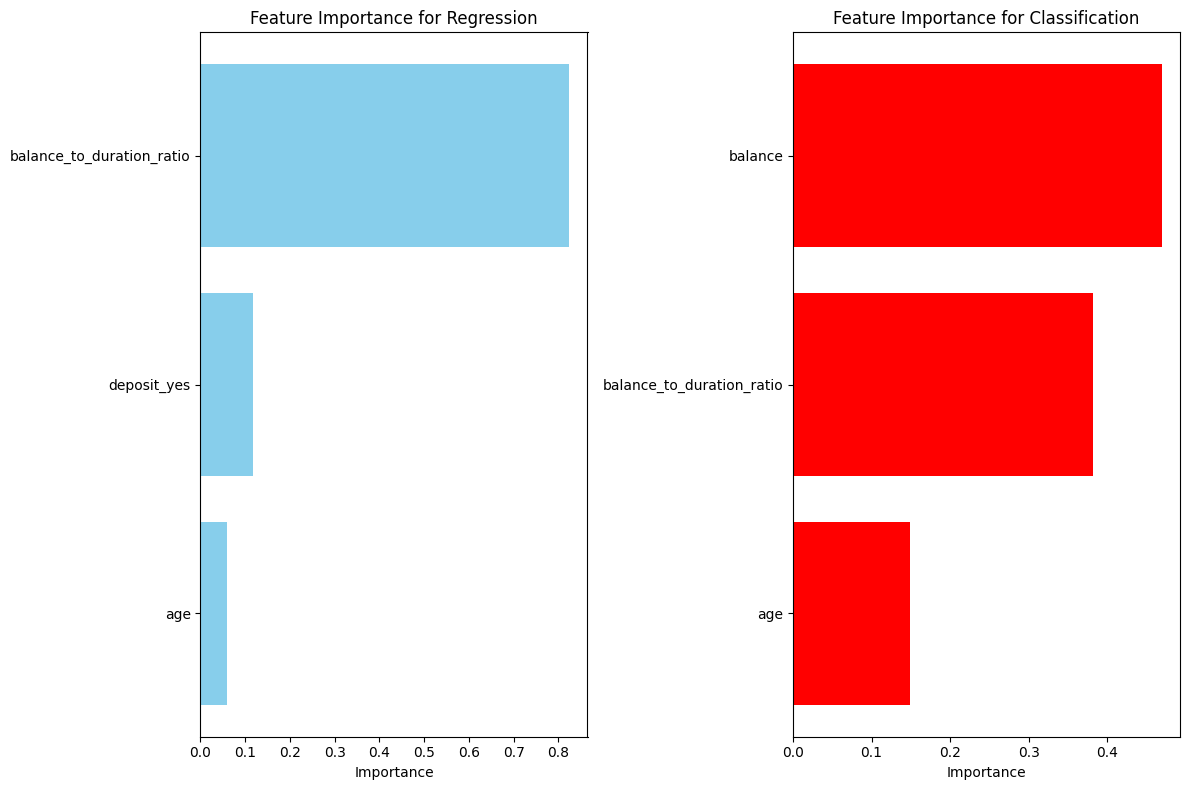

In [305]:
# Regression Analysis - Target Variable 'balance'
X_reg = data.drop('balance', axis=1)
y_reg = data['balance']

# Fitting Gradient Boosting for regression
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_reg, y_reg)

importances_reg = pd.DataFrame({'Feature': X_reg.columns, 'Importance': gradient_reg.feature_importances_})
importances_sorted_reg = importances_reg.sort_values(by='Importance', ascending=True)
# print("Feature Importance for Regression:\n", importances_sorted_reg)



# Classification Analysis - Target Variable 'deposit_yes'
X_cls = data.drop('deposit_yes', axis=1)
y_cls = data['deposit_yes']

# Fitting RandomForest for classification
gradient_cls = GradientBoostingClassifier()
gradient_cls.fit(X_cls, y_cls)

importances_cls = pd.DataFrame({'Feature': X_cls.columns, 'Importance': gradient_cls.feature_importances_})
importances_sorted_cls = importances_cls.sort_values(by='Importance', ascending=True)
# print("Feature Importance for Classification:\n", importances_sorted_cls)

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(importances_sorted_reg['Feature'], importances_sorted_reg['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Regression')

plt.subplot(1, 2, 2)
plt.barh(importances_sorted_cls['Feature'], importances_sorted_cls['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Feature Importance for Classification')

plt.tight_layout()
plt.show()

# **Model Evaluation and Validation**

## **Hyperparameter Tuning and Cross-Validation**

In [291]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 8, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(GradientBoostingRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print(f"Best Gradient Boosting Params: {grid_rf.best_params_}")
print(f"Best Cross-Validated MSE: {-grid_rf.best_score_}")

y_pred_rf = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_rf)
test_r2 = r2_score(y_test, y_pred_rf)

print(f"Test Set MSE: {test_mse:.5f}")
print(f"Test Set R²: {test_r2:.5f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Gradient Boosting Params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validated MSE: 0.7178682296425555
Test Set MSE: 0.71270
Test Set R²: 0.27251


In [297]:
# Define the parameter grid without 'auto' for max_features
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto', added None
    'max_depth': [10, 20, 30],
    'min_samples_split': [3, 6, 9]
}

# Initialize GridSearchCV with the corrected parameter grid
grid_rf = GridSearchCV(GradientBoostingRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_rf.fit(X_train, y_train)

# Retrieve the best estimator and its parameters
best_rf = grid_rf.best_estimator_
print(f"Best Gradient Boosting Params: {grid_rf.best_params_}")
print(f"Best Cross-Validated MSE: {-grid_rf.best_score_}")

# Predicting on the test set using the best estimator
y_pred_rf = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_rf)
test_r2 = r2_score(y_test, y_pred_rf)

print(f"Test Set MSE: {test_mse:.5f}")
print(f"Test Set R²: {test_r2:.5f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Gradient Boosting Params: {'max_depth': 10, 'max_features': None, 'min_samples_split': 9, 'n_estimators': 50}
Best Cross-Validated MSE: 0.794902960086849
Test Set MSE: 0.75662
Test Set R²: 0.22767


In [299]:
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 7],  # Lower depths to prevent overfitting
    'min_samples_split': [6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1]  # Fine-tuning the learning rate
}

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_gb.fit(X_train, y_train)
print(f"Best Gradient Boosting Params: {grid_gb.best_params_}")
print(f"Best Cross-Validated MSE: {-grid_gb.best_score_}")

y_pred_gb = grid_gb.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_gb)
test_r2 = r2_score(y_test, y_pred_gb)
print(f"Test Set MSE: {test_mse:.5f}")
print(f"Test Set R²: {test_r2:.5f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 150}
Best Cross-Validated MSE: 0.6766735938570863
Test Set MSE: 0.69557
Test Set R²: 0.29000


In [300]:
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, max_features='log2', min_samples_split=6, n_estimators=150)
model.fit(X_train, y_train)

predicitions = model.predict(X_test)
mse = mean_squared_error(y_test, predicitions)
r2 = r2_score(y_test, predicitions)
r2_train = r2_score(y_train, model.predict(X_train))
print(f"Gradient Boosting - MSE: {mse:.5f}, R² Test: {r2:.5f}, R² Train: {r2_train:.5f}")

Gradient Boosting - MSE: 0.69534, R² Test: 0.29023, R² Train: 0.37036


In [301]:
param_dist_rf_cls = {
    'n_estimators': [80, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 8, 18],
    'min_samples_split': [2, 5, 12],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf_cls = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist_rf_cls,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    error_score='raise'
)
random_search_rf_cls.fit(X_train_cls, y_train_cls)

best_rf_cls = random_search_rf_cls.best_estimator_
print(f"Best Gradient Boosting Classifier Params: {random_search_rf_cls.best_params_}")
print(f"Best Cross-Validated Accuracy: {random_search_rf_cls.best_score_}")

# Evaluate on test set
y_pred_cls_rf = best_rf_cls.predict(X_test_cls)
test_accuracy = accuracy_score(y_test_cls, y_pred_cls_rf)
test_precision = precision_score(y_test_cls, y_pred_cls_rf, average='macro')
test_recall = recall_score(y_test_cls, y_pred_cls_rf, average='macro')
test_f1 = f1_score(y_test_cls, y_pred_cls_rf, average='macro')

print(f"Test Set Accuracy: {test_accuracy:.5f}")
print(f"Test Set Precision: {test_precision:.5f}")
print(f"Test Set Recall: {test_recall:.5f}")
print(f"Test Set F1-Score: {test_f1:.5f}")

Best Gradient Boosting Classifier Params: {'n_estimators': 300, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
Best Cross-Validated Accuracy: 0.7498011612259685
Test Set Accuracy: 0.74339
Test Set Precision: 0.74292
Test Set Recall: 0.74346
Test Set F1-Score: 0.74303


In [302]:
param_grid_gb_cls = {
    'n_estimators': [80, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 8, 18],
    'min_samples_split': [2, 5, 12],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_gb_cls = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid=param_grid_gb_cls,
    cv=5,
    scoring='accuracy',
    verbose=1,
    error_score='raise'
)
grid_search_gb_cls.fit(X_train_cls, y_train_cls)

# Retrieve the best estimator and its parameters
best_gb_cls = grid_search_gb_cls.best_estimator_
print(f"Best Gradient Boosting Classifier Params: {grid_search_gb_cls.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search_gb_cls.best_score_}")

# Evaluate on test set
y_pred_cls_gb = best_gb_cls.predict(X_test_cls)
test_accuracy = accuracy_score(y_test_cls, y_pred_cls_gb)
test_precision = precision_score(y_test_cls, y_pred_cls_gb, average='macro')
test_recall = recall_score(y_test_cls, y_pred_cls_gb, average='macro')
test_f1 = f1_score(y_test_cls, y_pred_cls_gb, average='macro')

print(f"Test Set Accuracy: {test_accuracy:.5f}")
print(f"Test Set Precision: {test_precision:.5f}")
print(f"Test Set Recall: {test_recall:.5f}")
print(f"Test Set F1-Score: {test_f1:.5f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [303]:
param_dist_rf_cls = {
    'n_estimators': [250, 300, 350],  # Narrow range around the best
    'max_features': ['log2', 'sqrt'],  # Include both options to confirm the best
    'max_depth': [4, 5, 6],  # Explore around the current best depth
    'min_samples_split': [10, 12, 14],  # Fine-tuning around the best found
    'min_samples_leaf': [1, 2, 3]  # Slight adjustment to explore more generalization
}

random_search_rf_cls = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist_rf_cls,
    n_iter=50,  # Adjust the number of iterations if necessary
    cv=5,
    scoring='accuracy',
    random_state=42,
    error_score='raise',
    verbose=1
)
random_search_rf_cls.fit(X_train_cls, y_train_cls)

best_rf_cls = random_search_rf_cls.best_estimator_
print(f"Best Gradient Boosting Classifier Params: {random_search_rf_cls.best_params_}")
print(f"Best Cross-Validated Accuracy: {random_search_rf_cls.best_score_}")

# Evaluate on test set
y_pred_cls_rf = best_rf_cls.predict(X_test_cls)
test_accuracy = accuracy_score(y_test_cls, y_pred_cls_rf)
test_precision = precision_score(y_test_cls, y_pred_cls_rf, average='macro')
test_recall = recall_score(y_test_cls, y_pred_cls_rf, average='macro')
test_f1 = f1_score(y_test_cls, y_pred_cls_rf, average='macro')

print(f"Test Set Accuracy: {test_accuracy:.5f}")
print(f"Test Set Precision: {test_precision:.5f}")
print(f"Test Set Recall: {test_recall:.5f}")
print(f"Test Set F1-Score: {test_f1:.5f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Gradient Boosting Classifier Params: {'n_estimators': 300, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 4}
Best Cross-Validated Accuracy: 0.7494662814733957
Test Set Accuracy: 0.74742
Test Set Precision: 0.74673
Test Set Recall: 0.74673
Test Set F1-Score: 0.74673


In [304]:
model = GradientBoostingClassifier(n_estimators=300, min_samples_split=14, min_samples_leaf=2, max_features='log2', max_depth= 4)
model.fit(X_train_cls, y_train_cls)

predicitions = model.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, predicitions)
accuracy_train = accuracy_score(y_train_cls, model.predict(X_train_cls))
precision = precision_score(y_test_cls, predicitions, average='macro')
recall = recall_score(y_test_cls, predicitions, average='macro')
f1 = f1_score(y_test_cls, predicitions, average='macro')

print(f"Gradient Boosting Classifier - Accuracy Test: {accuracy:.5f}, Accuracy Train: {accuracy_train:.5f} Precision: {precision:.5f}, Recall: {recall:.5f}, F1-Score: {f1:.5f}")


Gradient Boosting Classifier - Accuracy Test: 0.74026, Accuracy Train: 0.80502 Precision: 0.73954, Recall: 0.73950, F1-Score: 0.73952


## **Overfitting and Underfitting**

In [25]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    if "Classifier" in name:
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f"{name} - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    else:
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"{name} - Training MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}, Training R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
        
evaluate_model("Random Forest Classifier", best_rf_cls, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
evaluate_model("Random Forest Regressor", best_rf, X_train, y_train, X_test, y_test)

Random Forest Classifier - Training Accuracy: 0.99, Test Accuracy: 0.84
Random Forest Regressor - Training MSE: 0.02, Test MSE: 0.13, Training R²: 0.98, Test R²: 0.86


KeyboardInterrupt: 

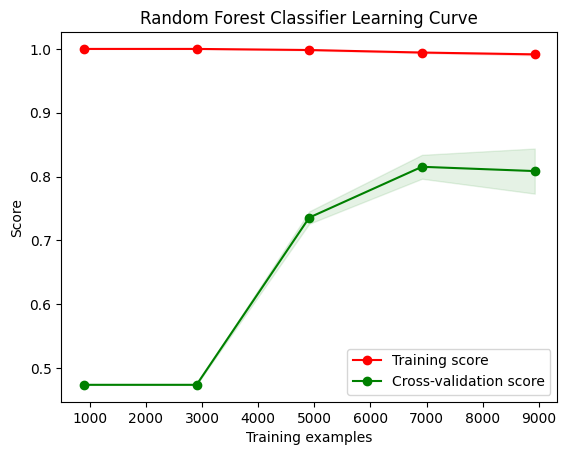

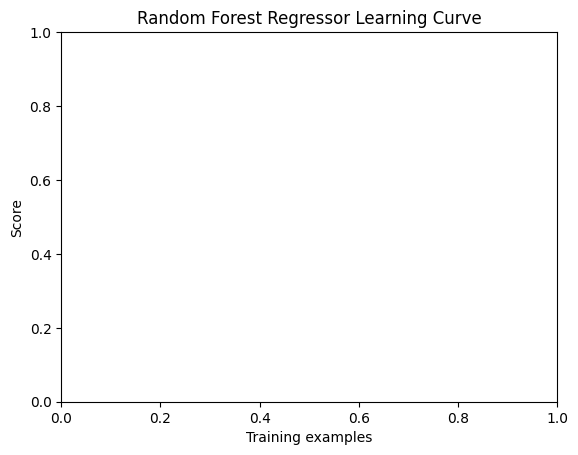

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy" if "Classifier" in title else "neg_mean_squared_error")
    train_scores_mean = -np.mean(train_scores, axis=1) if "Regressor" in title else np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1) if "Regressor" in title else np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(best_rf_cls, "Random Forest Classifier Learning Curve", X_cls, y_cls, cv=5)
plot_learning_curve(best_rf, "Random Forest Regressor Learning Curve", X, y, cv=5)
plt.show()

Random Forest Classifier - Overfitting. The training score is high, but the validation score is much lower than the training score.

Random Forest Regressor - Underfitting. Both training and validation scores are low, but they converge at a low score as more data is used.

# **Clustering**

## **K-Means Clustering**

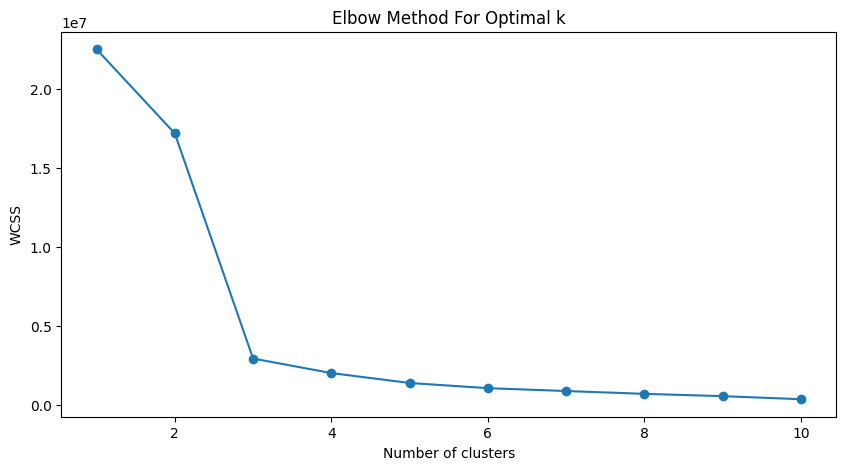

In [ ]:
features = data[['age', 'balance_to_duration_ratio']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Implementing K-Means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

plt.figure(figsize=(10, 6))
plt.scatter(features['age'], features['balance_to_duration_ratio'], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.title(f'K-Means Clustering with k={optimal_clusters}')
plt.xlabel('Age')
plt.ylabel('Balance to Duration Ratio')
plt.colorbar(label='Cluster Label')
plt.show()


NameError: name 'KMeans' is not defined

## **Hierarchical Clustering**

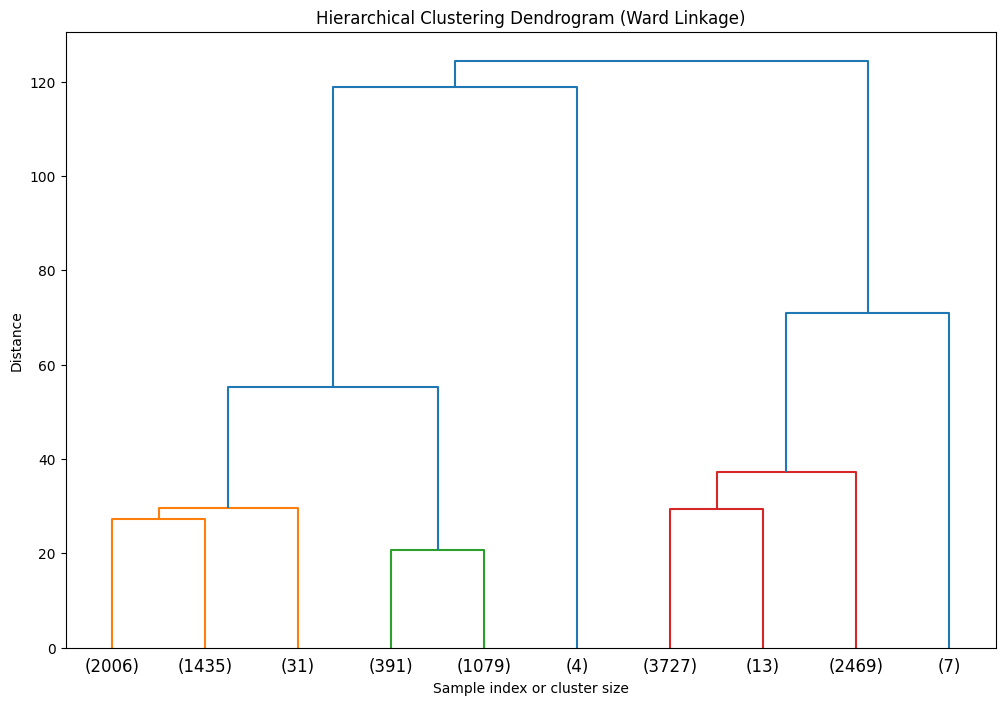

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

linked_ward = linkage(features_pca, method='ward')


plt.figure(figsize=(12, 8))
dendrogram(linked_ward,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=10,
           color_threshold=40)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample index or cluster size')
plt.ylabel('Distance')
plt.show()

## **DBSCAN Clustering**

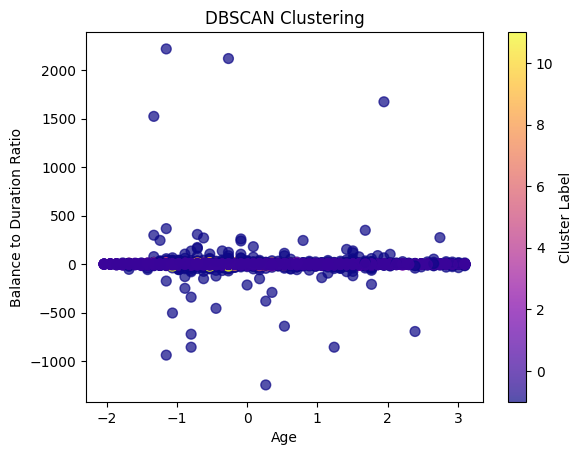

Noise points: 391


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features)

plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Balance to Duration Ratio')
plt.colorbar(label='Cluster Label')
plt.show()

# Identifying noise
noise = np.sum(clusters == -1)
print(f"Noise points: {noise}")
